# toy example for compex posterior

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
import seaborn as sns
from scipy.stats import multivariate_normal

In [25]:
theta_true = np.array([0.7,-2.9,-1,-0.9,0.6])
m_true = theta_true[0:2]
s1 = np.square(theta_true[2])
s2 = np.square(theta_true[3])
rho = np.tanh(theta_true[4])
S_true = np.array([[np.square(s1), rho*s1*s2],[rho*s1*s2, np.square(s2)]])

In [26]:
n_sample = 4
n_para = 5
ys = np.zeros(2*n_sample).reshape(n_sample,2)

for i in range(n_sample):
    ys[i] = np.random.multivariate_normal(m_true,S_true)

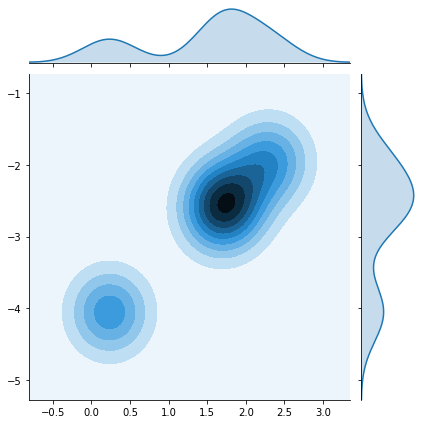

In [27]:
sns.jointplot(x=ys[:,0], y=ys[:,1], kind='kde')

In [28]:
def posterior(data,n_samples,theta_prop):
    m_prop = theta_prop[0:2]
    s1_prop = np.square(theta_prop[2])
    s2_prop = np.square(theta_prop[3])
    rho_prop = np.tanh(theta_prop[4])
    S_prop = np.array([[np.square(s1_prop), rho_prop*s1_prop*s2_prop],
                       [rho_prop*s1_prop*s2_prop, np.square(s2_prop)]])
    
    likelihood = 1
    for i in range(n_samples):
        likelihood = likelihood * multivariate_normal.pdf(data[i],m_prop,S_prop)
        
    return likelihood

In [29]:
posterior(ys,n_sample,theta_true)

8.75158779264884e-05

In [30]:
def generate_x0(theta_prop):
    m_prop = theta_prop[0:2]
    s1_prop = np.square(theta_prop[2])
    s2_prop = np.square(theta_prop[3])
    rho_prop = np.tanh(theta_prop[4])
    S_prop = np.array([[np.square(s1_prop), rho_prop*s1_prop*s2_prop],
                       [rho_prop*s1_prop*s2_prop, np.square(s2_prop)]])
    
    data = np.zeros(8).reshape(4,2)
    for j in range(4):
        data[j] = np.random.multivariate_normal(m_prop,S_prop)
        
    return data

In [55]:
n_dim = 100000
exact_sample = []
x0 = np.random.uniform(low=-3.0, high=3.0, size=5)
exact_sample.append(x0)

for i in range(n_dim):
    theta_prop = np.random.uniform(low=-3.0, high=3.0, size=5)
    m_prop = theta_prop[0:2]
    s1_prop = np.square(theta_prop[2])
    s2_prop = np.square(theta_prop[3])
    rho_prop = np.tanh(theta_prop[4])
    S_prop = np.array([[np.square(s1_prop), rho_prop*s1_prop*s2_prop],
                       [rho_prop*s1_prop*s2_prop, np.square(s2_prop)]])
    
    data = np.zeros(8).reshape(4,2)
    for j in range(4):
        data[j] = np.random.multivariate_normal(m_prop,S_prop)

    alpha = min(1,posterior(data,4,theta_true)/posterior(ys,4,theta_true))
    u = np.random.rand()
    if u <= alpha:
        exact_sample.append(theta_prop)
               
            
exact_sample = np.asarray(exact_sample)

In [56]:
exact_sample

array([[-1.54279811,  2.8982689 , -2.51222149,  1.38924496, -2.67105043],
       [ 0.7868464 , -2.08585636,  0.66470476, -0.28525686,  0.83627055],
       [ 1.51283133, -2.70775192, -1.19568159, -0.3983505 , -1.36554337],
       ...,
       [ 0.97460708, -1.7045578 ,  0.26432879, -0.51653488, -1.57687953],
       [ 1.80192102, -2.51191859, -1.40121038,  0.37587394, -0.72683493],
       [-0.44529839, -2.47426393, -0.47289593,  0.87957211,  0.57871663]])

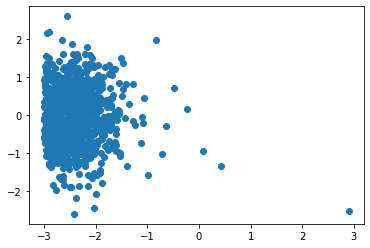

In [57]:
plt.scatter(exact_sample[:,1],exact_sample[:,2])

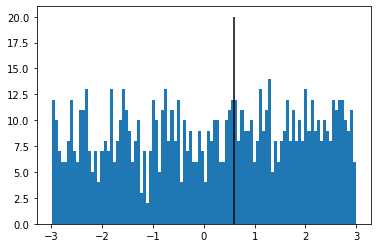

In [62]:
plt.hist(exact_sample[:,4], bins=100)
plt.vlines(x=.6,ymin = 0,ymax = 20)

## SNL